<a href="https://colab.research.google.com/github/CREVIOS/SSI_2020/blob/master/Lecture_5_4_Dimension_Reduction_%5BSOLUTION%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codealong - Dimension Reduction

In this codealong you will be learning how to perform dimension reduction with sklearn

## 0. Setup

Run the following code to setup our imports and dataset. Note that this includes seperating into train, val, and test, because you've done enough of that already :)

For this codealong we're loading in the MNIST dataset from before, but will be reducing its dimensions!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train = pd.read_csv("sample_data/mnist_train_small.csv")
display(data_train)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train = data_train.to_numpy()
data_train = data_train
display(data_train)

data_test = pd.read_csv("sample_data/mnist_test.csv")
data_test = data_test.to_numpy()
data_test = data_test
display(data_test)

np.random.seed(19)
np.random.shuffle(data_test)

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [ ]:
def val_test_split(dataset):
  split_index = dataset.shape[0] // 2
  return np.split(dataset, [split_index])

data_val, data_test = val_test_split(data_test)

In [ ]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_val = data_val[:, 1:]
y_val = data_val[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

## 1. Reduce the MNIST dataset

Reduce the MNIST dataset from 784 dimensions down to 20 dimensions. Start by importing `PCA` from `sklearn.decomposition`, and creating a new `PCA` object (passing in `n_components=20` and `whiten=True`). Then, fit that `PCA` object on `X_train`.

Reference the [`PCA` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) if need be.

In [ ]:
# TODO: Create and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=20, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

Try running the cell below to see the shape of our data! It doesn't seem to have changed, and this is because we haven't actually transformed our data yet!

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(19999, 784)
(4999, 784)
(5000, 784)


Now, transform `X_train`, `X_val`, and `X_test` using `PCA.transform()` (read about how it works in the documentation)!

In [ ]:
# TODO: Transform our data with PCA
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

Run this identical cell again, and see how the shapes of our data have changed!

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(19999, 20)
(4999, 20)
(5000, 20)


## 2. Rerun KNN

Create and fit our KNN model as we've done before (passing in `n_neighbors = 5`).

In [ ]:
# TODO: Create and fit our knn model
import sklearn.neighbors

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predict with our KNN model and print the F1 Score. Is it any good after dimension reduction?

In [ ]:
# TODO: Predict and evaluate our KNN model which was trained on reduced data
import sklearn.metrics

yhat_val = knn.predict(X_val)
sklearn.metrics.f1_score(y_val, yhat_val, average='macro')

0.9504297660470693

Try rerunning all the cells with different values for the amount of dimensions. Notice how the F1 Score changes. Lower dimensions should lead to worse F1 Scores, but some information should still be kept. Also note the tradeoff in time it takes to run!

There's two primary ways to choose how many dimensions to reduce to. For one, we can use a similar elbow technique to clustering (discussed in the slides). We can also check validation performance, and pick the dimensions that give us the best yield in that regard!

As we've seen, this is a comparitively small example of what we can change and choose when it comes to Machine Learning. Even with just classification, we can choose the amount of dimensions to reduce to, the type of model to use (KNN, Logistic Regression, Decision Trees), the hyperparameters within each model (how many neighbors, how deep should the tree be, etc...). **There's a lot of decisions to make!**

This may be understandably intimidating, but it should also be exciting! We have so much power and freedom with the tools we have at our disposal!

# Codealong - Graphing Variance Explained

In this codealong, we are going to be graphing percentage of variance explained vs. number of dimensions!

In [ ]:
NEW_DIM = 200
# TODO: Create a new pca object with NEW_DIM components and fit it on X_train
pca = PCA(n_components=NEW_DIM, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

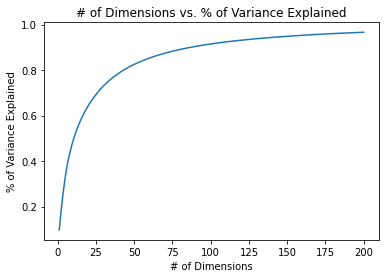

In [ ]:
# TODO: Plot number of dimensions against percent of variance explained
# HINT: Use np.cumsum and pca.explained_variance_ratio_
x = np.arange(1, NEW_DIM + 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.title("# of Dimensions vs. % of Variance Explained")
plt.xlabel("# of Dimensions")
plt.ylabel("% of Variance Explained")
plt.plot(x, y)